In [1]:
options(htmltools.dir.version = FALSE)
library(tidyverse)
library(DAAG)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


1. The Iowa data set `iowa.csv` is a toy example that summarises the yield of wheat (bushels per acre) for the state of Iowa between 1930-1962. In addition to yield, year, rainfall and temperature were recorded as the main predictors of yield.

    a. First, we need to load the data set into R using the command `read.csv()`. Use the help function to learn what arguments this function takes. Once you have the necessary input, load the data set into R and make it a data frame called `iowa.df`.

    b. How many rows and columns does `iowa.df` have? 

    c. What are the names of the columns of `iowa.df`?

    d. What is the value of row 5, column 7 of `iowa.df`?
    
    e. Display the second row of `iowa.df` in its entirety.

In [15]:
iowa.df <- read.csv("data/iowa.csv", sep = ";", header = T)
dim(iowa.df)
colnames(iowa.df)
iowa.df[5, 7]
iowa.df[2, ]


[1] 33 10

[1] "Year"  "Rain0" "Temp1" "Rain1" "Temp2" "Rain2" "Temp3" "Rain3" "Temp4"
[10] "Yield"

[1] 79.7

,Year,Rain0,Temp1,Rain1,Temp2,Rain2,Temp3,Rain3,Temp4,Yield
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1931,14.76,57.5,3.83,75,2.72,77.2,3.3,72.6,32.9


2. Syntax and class-typing.

a. For each of the following commands, either explain why they should be errors, or explain the non-erroneous result.

```r
vector1 <- c("5", "12", "7", "32")
max(vector1)
sort(vector1)
sum(vector1)

```

> Answer:
> - `max(vector1)` will return "7" as it compares the strings lexicographically, not numerically.
> - `sort(vector1)` will sort the vector lexicographically, resulting in `c("12", "32", "5", "7")`.
> - `sum(vector1)` will produce an error because you cannot sum character strings directly; it requires numeric values.



b. For the next series of commands, either explain their results, or why they should produce errors.

```r
vector2 <- c("5", 7, 12)
vector2[2] + vector2[3]

dataframe3 <- data.frame(z1 = "5", z2 = 7, z3 = 12)
dataframe3[1, 2] + dataframe3[1, 3]

list4 <- list(z1 = "6", z2 = 42, z3 = "49", z4 = 126)
list4[[2]] + list4[[4]]
list4[2] + list4[4]
```

> Answer:
> - `vector2[2] + vector2[3]` will produce error because R automatically converts 7 to a character string "7" when it is added to "12", resulting in a type mismatch.
> - `dataframe3[1, 2] + dataframe3[1, 3]` will produce 19 because R do not convert the type of the data frame elements.
> - `list4[[2]] + list4[[4]]` will produce 168 because R converts the elements to numeric before addition.
> - `list4[2] + list4[4]` will produce an error because it tries to add two lists, which is not defined in R.



3. Working with functions and operators.

    a. The colon operator will create a sequence of integers in order. It is a special case of the function `seq()` which you saw earlier in this assignment. Using the help command `?seq` to learn about the function, design an expression that will give you the sequence of numbers from 1 to 10000 in increments of 372. Design another that will give you a sequence between 1 and 10000 that is exactly 50 numbers in length.

    b. The function `rep()` repeats a vector some number of times. Explain the difference between `rep(1:3, times=3)` and `rep(1:3, each=3)`.

> Answer a: 

In [ ]:
seq(from = 1, to = 10000, by = 372)
seq(from = 1, to = 10000, length.out = 50)


[1]    1  373  745 1117 1489 1861 2233 2605 2977 3349 3721 4093 4465 4837 5209
[16] 5581 5953 6325 6697 7069 7441 7813 8185 8557 8929 9301 9673

[1]     1.0000   205.0612   409.1224   613.1837   817.2449  1021.3061
 [7]  1225.3673  1429.4286  1633.4898  1837.5510  2041.6122  2245.6735
[13]  2449.7347  2653.7959  2857.8571  3061.9184  3265.9796  3470.0408
[19]  3674.1020  3878.1633  4082.2245  4286.2857  4490.3469  4694.4082
[25]  4898.4694  5102.5306  5306.5918  5510.6531  5714.7143  5918.7755
[31]  6122.8367  6326.8980  6530.9592  6735.0204  6939.0816  7143.1429
[37]  7347.2041  7551.2653  7755.3265  7959.3878  8163.4490  8367.5102
[43]  8571.5714  8775.6327  8979.6939  9183.7551  9387.8163  9591.8776
[49]  9795.9388 10000.0000

> Answer b:
> - `rep(1:3, times=3)` will repeat the entire vector `1:3` three times, resulting in `1, 2, 3, 1, 2, 3, 1, 2, 3`.
> - `rep(1:3, each=3)` will repeat each element of the vector `1:3` three times, resulting in `1, 1, 1, 2, 2, 2, 3, 3, 3`.

MB.Ch1.2. The orings data frame gives data on the damage that had occurred in US space shuttle launches prior to the disastrous Challenger launch of 28 January 1986. The observations in rows 1, 2, 4, 11, 13, and 18 were included in the pre-launch charts used in deciding whether to proceed with the launch, while remaining rows were omitted.

Create a new data frame by extracting these rows from orings, and plot total incidents against temperature for this new data frame. Obtain a similar plot for the full data set.

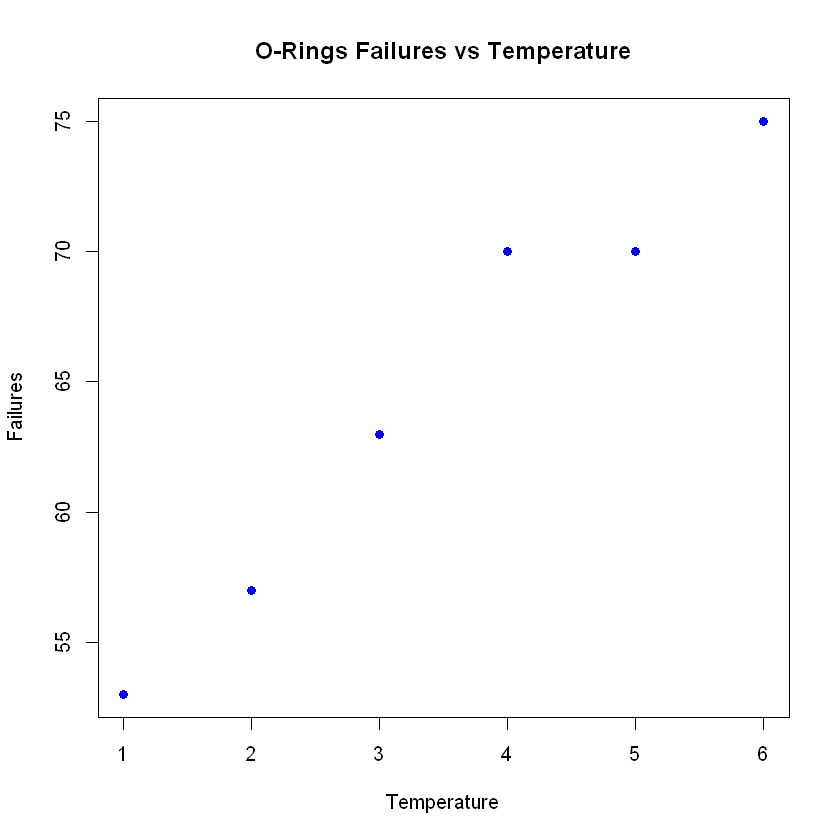

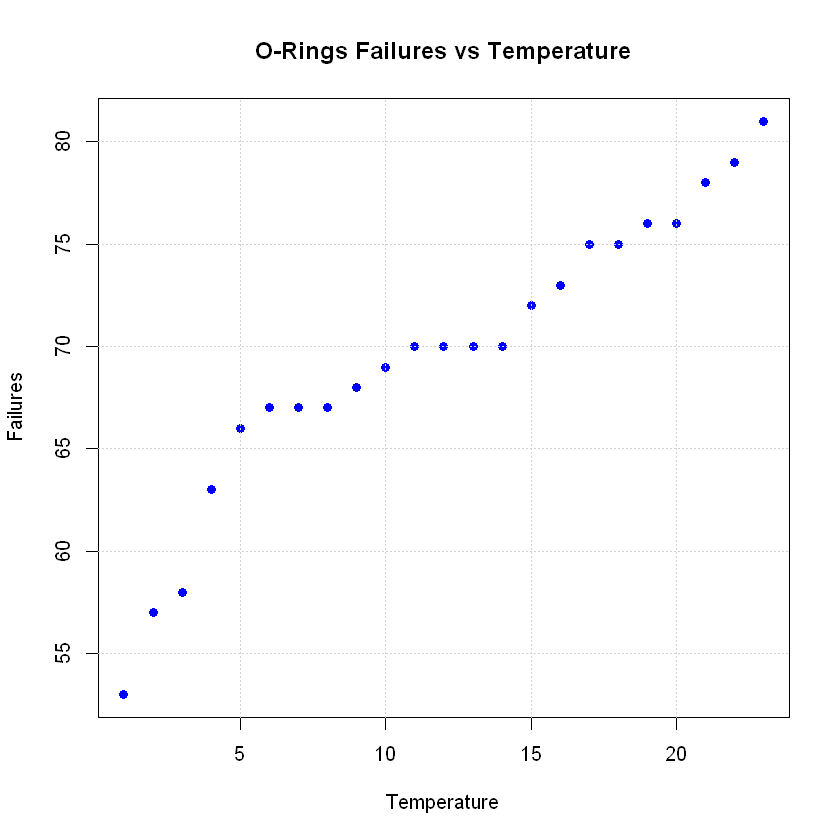

In [ ]:
data("orings")

selected_rows <- c(1, 2, 4, 11, 13, 18)
orings_subset <- orings[selected_rows, ]

plot(orings_subset$Temperature, orings_subset$Failures,
    xlab = "Temperature", ylab = "Failures",
    main = "O-Rings Failures vs Temperature",
    pch = 19, col = "blue"
)

plot(orings$Temperature, orings$Failures,
    xlab = "Temperature", ylab = "Failures",
    main = "O-Rings Failures vs Temperature",
    pch = 19, col = "blue"
)


MB.Ch1.4. For the data frame `ais` (DAAG package)

(a) Use the function `str()` to get information on each of the columns. Determine whether any of the columns hold missing values.

(b) Make a table that shows the numbers of males and females for each different sport. In which sports is there a large imbalance (e.g., by a factor of more than 2:1) in the numbers of the two sexes?


> Answer:

In [ ]:
data("ais")
str(ais)
sum(is.na(ais))

table <- with(ais, table(sport, sex))

gender_ratio <- apply(table, 1, function(x) {
    min(x) / max(x)
})

imbalance_index <- which(gender_ratio < 0.5)

imbalance_df <- data.frame(
    females = table[imbalance_index, "f"],
    males = table[imbalance_index, "m"]
)

imbalance_df


'data.frame':	202 obs. of  13 variables:
 $ rcc   : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc   : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc    : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg    : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ ferr  : num  60 68 21 69 29 42 73 44 41 44 ...
 $ bmi   : num  20.6 20.7 21.9 21.9 19 ...
 $ ssf   : num  109.1 102.8 104.6 126.4 80.3 ...
 $ pcBfat: num  19.8 21.3 19.9 23.7 17.6 ...
 $ lbm   : num  63.3 58.5 55.4 57.2 53.2 ...
 $ ht    : num  196 190 178 185 185 ...
 $ wt    : num  78.9 74.4 69.1 74.9 64.6 63.7 75.2 62.3 66.5 62.9 ...
 $ sex   : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport : Factor w/ 10 levels "B_Ball","Field",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] 0

,females,males
,<int>,<int>
Gym,4,0
Netball,23,0
T_Sprnt,4,11
W_Polo,0,17



MB.Ch1.6. Create a data frame called Manitoba.lakes that contains the lake's elevation (in meters above sea level) and area (in square kilometers) as listed below. Assign the names of the lakes using the `row.names()` function.

\begin{table}
  \begin{center}
\begin{tabular}{l|r|r} \hline
                & elevation & area \\ \hline
Winnipeg        &     217   & 24387 \\
Winnipegosis    &     254   & 5374 \\
Manitoba        &     248   & 4624 \\
SouthernIndian  &     254   & 2247 \\
Cedar           &     253   & 1353 \\
Island          &     227   & 1223 \\
Gods            &     178   & 1151 \\
Cross           &     207   & 755 \\
Playgreen       &    217    & 657 \\\hline
\end{tabular}
\end{center}
\end{table}

(a) Use the following code to plot `log2(area)` versus elevation, adding labeling information (there is an extreme value of area that makes a logarithmic scale pretty much essential):

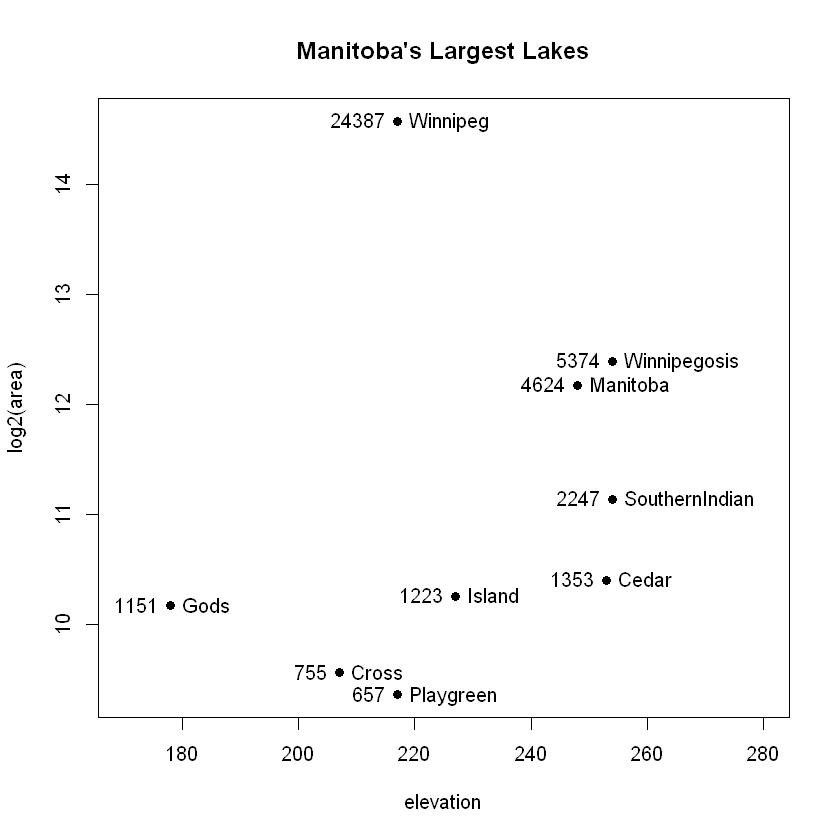

In [ ]:
elevation <- c(217, 254, 248, 254, 253, 227, 178, 207, 217)
area <- c(24387, 5374, 4624, 2247, 1353, 1223, 1151, 755, 657)
lake_names <- c(
    "Winnipeg", "Winnipegosis", "Manitoba", "SouthernIndian",
    "Cedar", "Island", "Gods", "Cross", "Playgreen"
)

Manitoba.lakes <- data.frame(elevation, area)
row.names(Manitoba.lakes) <- lake_names

plot(log2(area) ~ elevation, pch = 16, xlim = c(170, 280))
# NB: Doubling the area increases log2(area) by 1.0
text(log2(area) ~ elevation, labels = row.names(Manitoba.lakes), pos = 4)
text(log2(area) ~ elevation, labels = area, pos = 2)
title("Manitoba's Largest Lakes")


Devise captions that explain the labeling on the points and on the y-axis. It will be necessary to explain how distances on the scale relate to changes in area.


> Answer:
> 
> A unit increase in `log2(area)` corresponds to a doubling of the area.


(b) Repeat the plot and associated labeling, now plotting area versus elevation, but specifying `ylog=TRUE` in order to obtain a logarithmic y-scale.

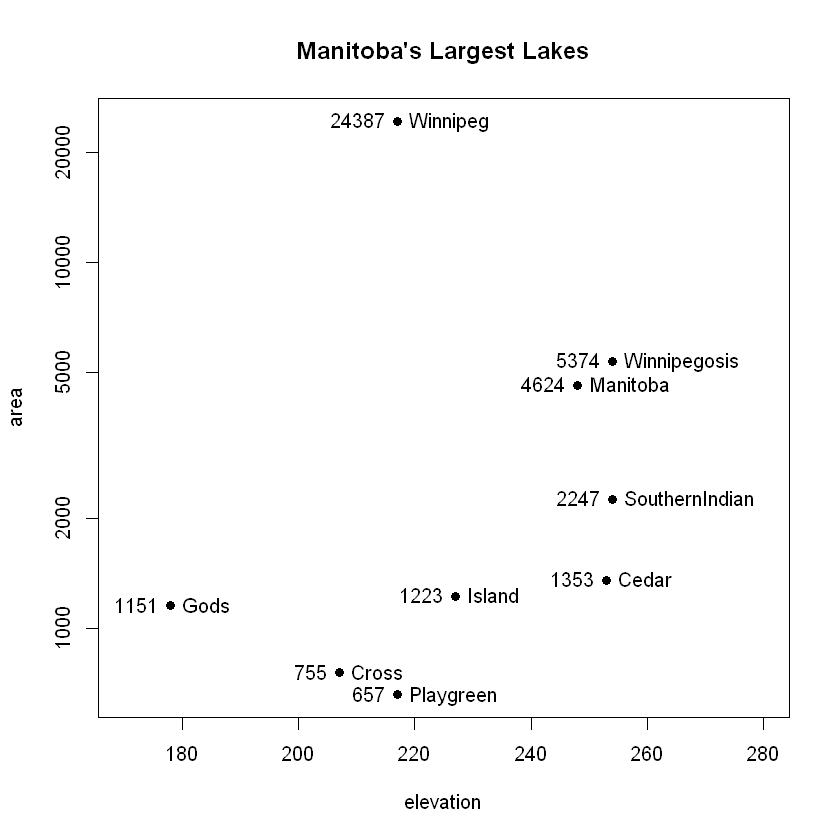

In [52]:
plot(area ~ elevation, pch = 16, xlim = c(170, 280), log = "y")
text(area ~ elevation, labels = row.names(Manitoba.lakes), pos = 4, ylog = TRUE)
text(area ~ elevation, labels = area, pos = 2, ylog = TRUE)
title("Manitoba's Largest Lakes")


MB.Ch1.7. Look up the help page for the R function `dotchart()`. Use this function to display the areas of the Manitoba lakes (a) on a linear scale, and (b) on a logarithmic scale. Add, in each case, suitable labeling information.

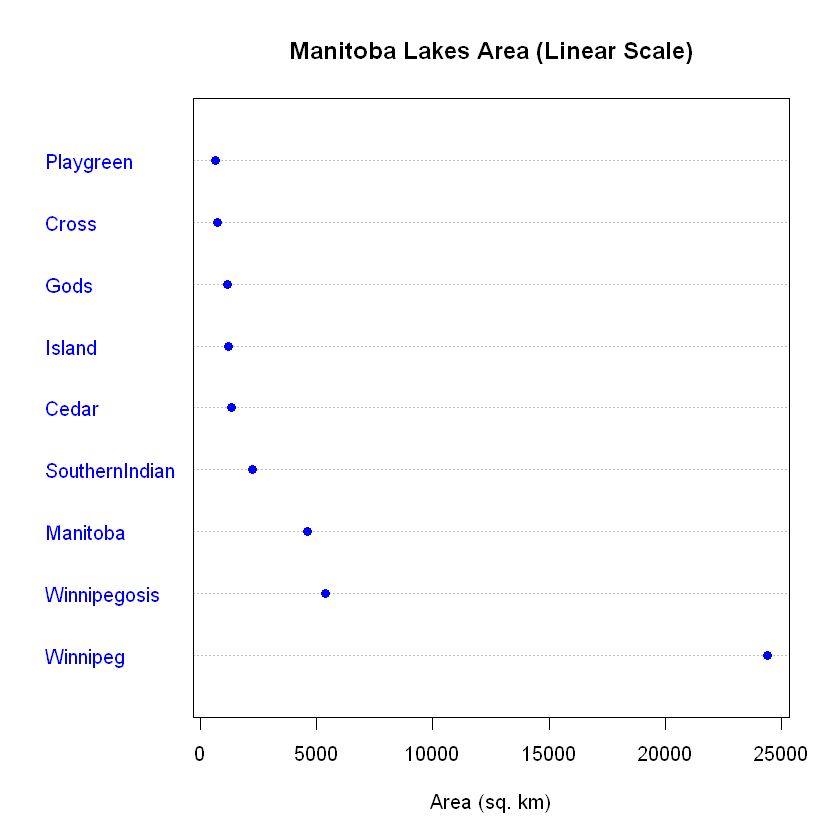

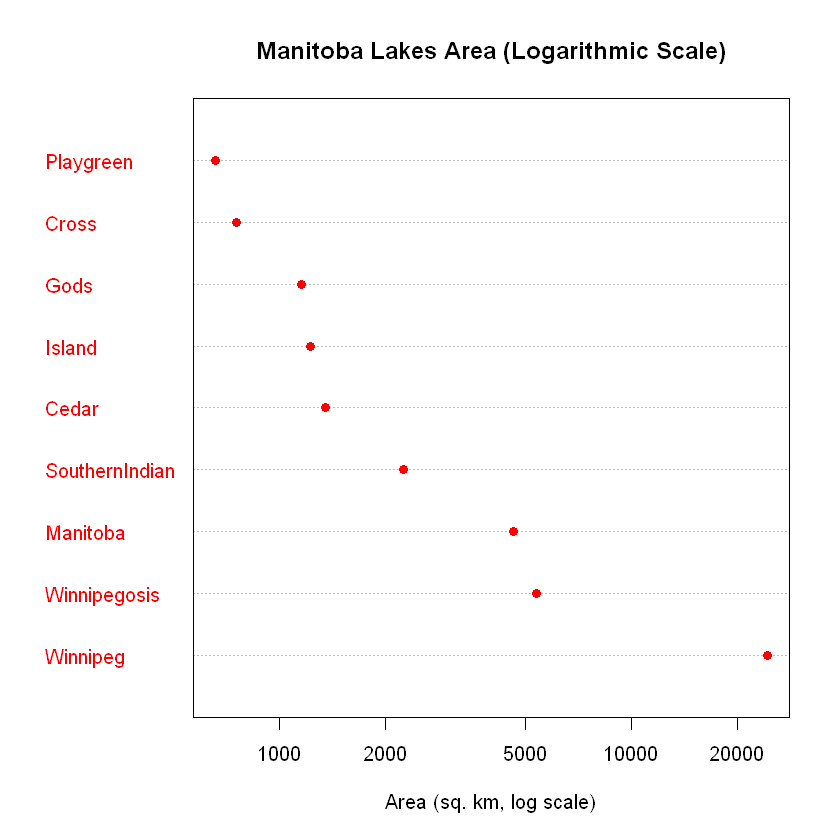

In [ ]:
dotchart(Manitoba.lakes$area,
    labels = row.names(Manitoba.lakes),
    main = "Manitoba Lakes Area (Linear Scale)",
    xlab = "Area (sq. km)",
    pch = 19,
    color = "blue"
)
dotchart(Manitoba.lakes$area,
    labels = row.names(Manitoba.lakes),
    main = "Manitoba Lakes Area (Logarithmic Scale)",
    xlab = "Area (sq. km, log scale)",
    log = "x",
    pch = 19,
    color = "red"
)


MB.Ch1.8. Using the `sum()` function, obtain a lower bound for the area of Manitoba covered by water.


In [54]:
sum(Manitoba.lakes$area)


[1] 41771